In [2]:
import numpy as np
import matplotlib.pyplot as plt



Question 1 

In this part, start by organizing your data in the different sets you will need and plot the different sets. Explain
how you divided your data and justify this division

In [29]:
weight = np.loadtxt('children.txt', delimiter = ' ')

In [30]:
weight.shape

(551, 2)

In [31]:
max(weight[0])

11.0

In [38]:
def random_split(data,test_points):
    ranks = np.arange(data.shape[0])
    np.random.shuffle(ranks)
    train = data[ranks>=test_points,:]
    test = data[ranks<test_points,:]
    return train,test


train, temp = random_split(weight, 350)
valid, test = random_split(temp, 201 )

valid.shape

(149, 2)

Question 2

Trying polynomial curves of degrees 1 through 12, find the best polynomial degree and the coefficients of the
best curve. Explain your approach, explaining how you use your data for this task and justifying your conclusions.

In [22]:
def m_sq_er(data,coefs):
    pred = np.polyval(coefs,data[:,0])
    error = np.mean((data[:,1]-pred)**2) #data[:,1] sao os y
    return error

best_err = 10000000 

for degree in range(1,13):
    coefs = np.polyfit(train[:,0],train[:,1],degree)
    valid_error = m_sq_er(valid,coefs)
    if valid_error < best_err:
        best_err = valid_error
        best_coef = coefs
        best_degree = degree


In [41]:
print (best_degree,'\n', best_coef, '\n',best_err)

8 
 [-5.71000268e-08  5.06282095e-06 -1.77102963e-04  3.07526065e-03
 -2.71246945e-02  1.07945034e-01 -1.31976791e-01  5.86331591e-01
  4.63928445e+00] 
 1.5509063761519029


(0.0, 25.0, 0.0, 20.0)

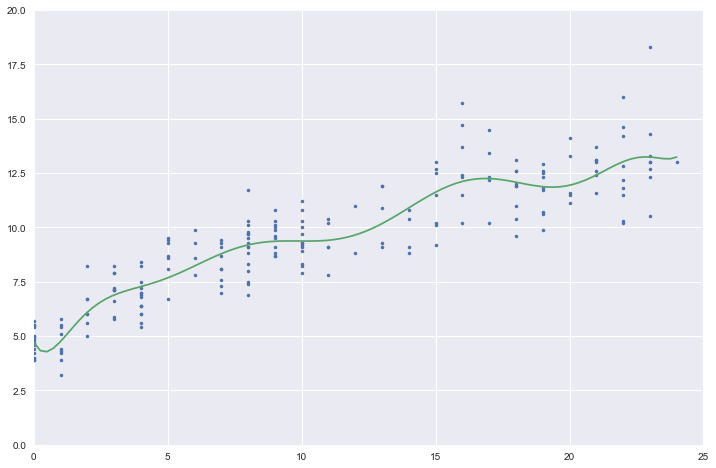

In [24]:
x= train[:,0]
y=train[:,1]
pxs = np.linspace(0, max(x), 100) #use 100 points
poly = np.polyval(coefs, pxs) #calculate the value for each x defined by pxs, considering the coefficients calculated by polyfit

plt.figure(figsize = (12,8))
plt.plot(x,y, '.')
plt.plot(pxs, poly, '-')
plt.axis([0,25,0,20])


Question 3
Indicate what is the expected error of your curve when predicting the weight of children from their age in
months. Note that the error should be in Kg, so take careful note of the units you are computing. Justify your
answer, both the value obtained and the data used to obtain it.

In [1]:
test_error = np.sqrt(m_sq_er(test, best_coef))
print(test_error)

NameError: name 'np' is not defined

Question 4
Plot the best curve you found along with the data used to fit the curve coefficients and represent the
uncertainty of this curve with different shades at the levels the confidence intervals of 95% and 99%. Explain
how your code works.

In [26]:
plt.style.use("seaborn")


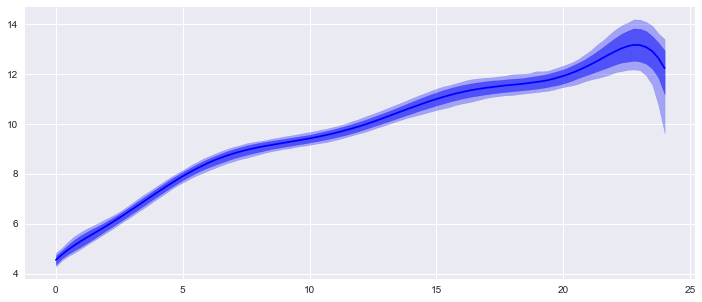

In [42]:
def bootstrap_poly (data, replicas, x, degree):
    lines = []
    params = []
    for i in range(replicas):
        ixs = np.random.randint(0, data.shape[0], data.shape[0])
        rep_data = data[ixs, :]
        coefs = np.polyfit(rep_data[:,0], rep_data[:,1], degree)
        y = np.polyval(coefs, x)
        params.append(coefs)
        lines.append(y)
    return np.array(params), np.array(lines)


def plot_bootstrap(lines, x, color):
    center = np.percentile(lines, 50, axis=0)
    interval = np.percentile (lines, [0.5, 5,95, 99.5],axis=0)
    plt.plot(x, center, '-',color=color)
    plt.fill_between(x, interval[0,:], interval[-1,:], color=color, alpha=0.3)
    plt.fill_between(x, interval[1,:], interval[2,:], color=color, alpha=0.5)


plt.figure(figsize=(12,5))

x = np.linspace(0, 24 ,100)


params, lines = bootstrap_poly(weight, 1000, x, best_degree)

plot_bootstrap(lines,x,'blue')

